In [21]:
#!/usr/bin/env python
# coding: utf-8
import json
import tensorflow as tf
import numpy as np
import csv
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, SpatialDropout2D, SpatialDropout1D, Flatten, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [3]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

('sarcasm.json', <http.client.HTTPMessage at 0x7fae0e30dcd0>)

In [4]:
# HyprerParamters
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [5]:
# Load Data
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [6]:
sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
#model = tf.keras.Sequential([
   # tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
   # tf.keras.layers.Dense(1, activation='sigmoid') ])

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))

model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(400)))
model.add(Dropout(0.1))
model.add(Dense(80, activation='elu'))
model.add(Dense(300, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_9 (Bidirectio  (None, 120, 256)         148480    
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 120, 512)         1050624   
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 120, 512)          0         
                                                                 
 batch_normalization_3 (Batc  (None, 120, 512)         2048      
 hNormalization)                                                 
                                                      

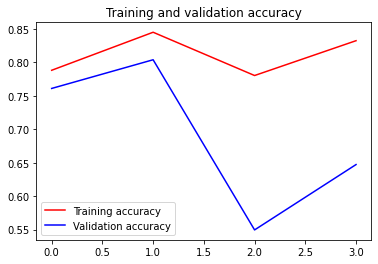

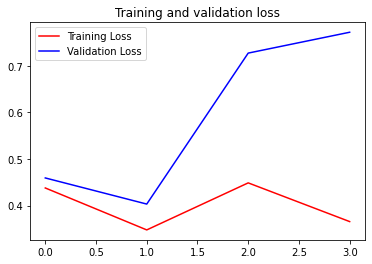

In [ ]:
# Plot the chart for accuracy and loss on both training and validation 
import matplotlib.pyplot as plt 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']   
val_loss = history.history['val_loss']  
 
epochs = range(len(acc)) 
 
plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
 
plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend() 
 
plt.show()

In [28]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model2.add(SpatialDropout1D(0.2)),
model2.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0, activation='tanh',recurrent_activation='sigmoid', unroll=False, use_bias=True)))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model2.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), verbose=1, callbacks=[callback])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 16)           16000     
                                                                 
 spatial_dropout1d_10 (Spati  (None, 120, 16)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_9 (Bidirectio  (None, 256)              148480    
 nal)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 164,737
Trainable params: 164,737
Non-t

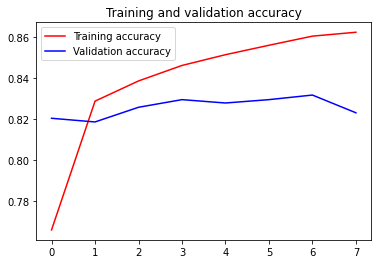

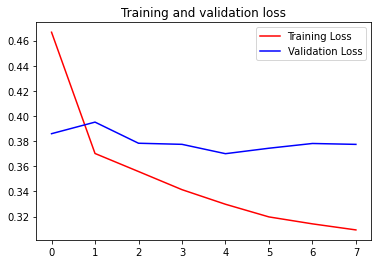

In [29]:
# Plot the chart for accuracy and loss on both training and validation 
import matplotlib.pyplot as plt 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss']   
val_loss = history.history['val_loss'] 
 
epochs = range(len(acc)) 
 
plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
plt.legend() 
plt.figure() 
 
plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend() 
 
plt.show()

In [36]:
model.save('sarcasm.h5')